# Fake news detector

Often we see many news, some of them  are impresive talking about strange cases of new illness or new laws or even lifestyle of famoues people without any formal investigation, that is called **'Fake News'**. That is why in this project I will try to make a fake news detector to find the trusted news between the ocean of news.

* For that we will use this tools:
- TF : Time Frecuency that a word is displayed in the new.
- IDF: Inverse Document Frecuency, measures the importance of the word in the new comparing it with another documents.

Both of them are frecuency vectors, the product of them give us a Matrix the we are going to call *Brute Frecuency of the Term*(TF-IDF).
- Pasive Aggressive Clasifier, when we run the clasification if its is correct the algorithm turns passive it means do nothing, and if it is wrong or has misscalculations turns in aggresive updating new values.

In [1]:
# Importing the necesary libraries
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# A brief look of the data
df=pd.read_csv('news.csv')
df.head(6)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE


In [3]:
# Size of the data
df.shape

(6335, 4)

In [4]:
# As we can see there is a label row each row that categorize it in FAKE or REAL
labels=df.label
labels.head(6)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
Name: label, dtype: object

In [5]:
# Now we split the data, the independent value will be 'TEXT'(X) and the dependent value will be 'LABELS'(Y).
# For that purpose we split the data in tow parts the train(80%) and the test(20%) and
#pick a seed(7) to have same output each time that we run the code 

x_train,x_test,y_train,y_test = train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [6]:
# Now we vectorize the data with the function 'TfidfVectorizer' 
# The texts provided is in English, in order of that we are going to ignore their 'stop words' (a,an,the,in,etc.)
# We can create our own stop_words list, but we use the predifined on TfidfVectorizer for English
# max_df = 0.7 will remove all words that appears in more than 70% of the articles

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [7]:
# We start to vectorize the documents in a matrix '
# fit_transform: creates a numeric matrix with the vocabulary on _train and normalizes fills values for empty spaces in each row
# transform: creates a numeric matrix with the vocabulary on x_test,
# filling the empty spaces with the normalized values foundfor x_train

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [12]:
# Let's have a look what happened to the train set (x). First we have separeted the dataset in x_train(80% of the data)
x_train.head()

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
Name: text, dtype: object

In [9]:
# Then we transformed the string values in numeric values inside a matrix
tfidf_train.toarray(5)

array([[0.        , 0.02687048, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.08568744, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01143476, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
# Now we will use the passive aggressive algorithm
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [14]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.82%


In [15]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[588,  50],
       [ 41, 588]], dtype=int64)

In [70]:
from sklearn import metrics
from matplotlib import pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text( j, i, cm[ i, j],
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


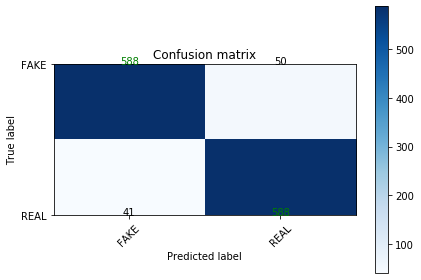

In [71]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])